# House Price Prediction
## Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [52]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## Data Understanding

In [2]:
# import the housing dataset
df = pd.read_csv('./Housing.csv')


In [3]:
# checking how dataframe looks
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# checking the shape of data
df.shape

(545, 13)

In [5]:
# checking the info for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


```
No null value found
```

In [6]:
# checking for duplicate rows
df.duplicated().sum()

0

```
No duplicate rows found
```

In [7]:
# checking statistical info for categorical data
df.select_dtypes('object').describe()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [8]:
# checking statistical info for numerical data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data Cleaning

```
['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
These variables are binary categorial variables. We will convert yes to 1 and no 0 as linear regression model only deals with numeric values.
```

In [9]:
# converting yes to 1 and no 0 for binary categorical features.
binary_categorical_vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'] 
df[binary_categorical_vars] = df[binary_categorical_vars].apply(lambda x: x.map({'yes':1,'no':0}))

In [10]:
# checking the dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## Bivariate Analysis

In [11]:
def create_bar_chart(feature):
    sns.barplot(data=df,x=feature,y='price')
    plt.show()


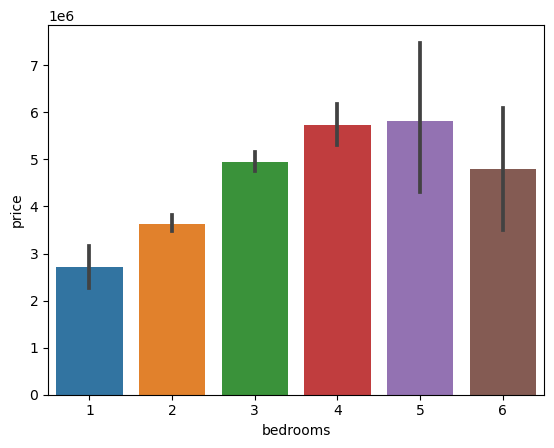

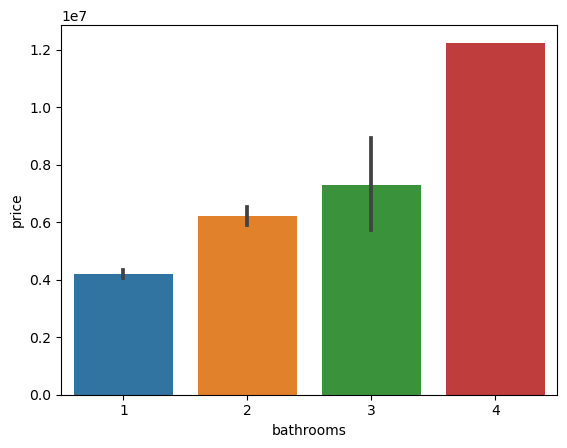

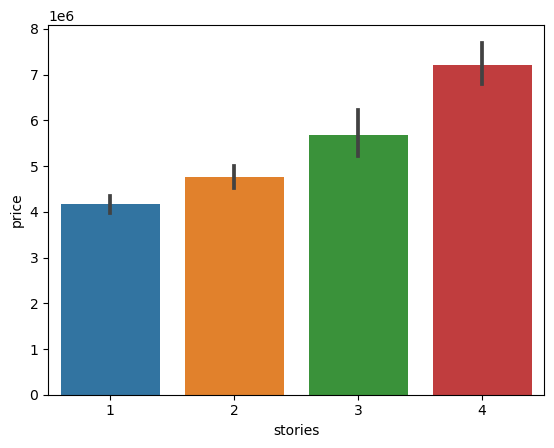

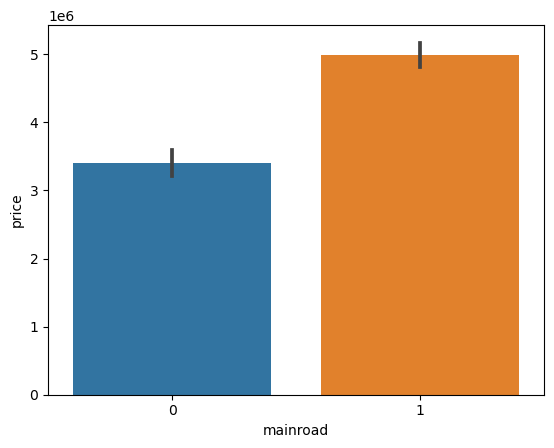

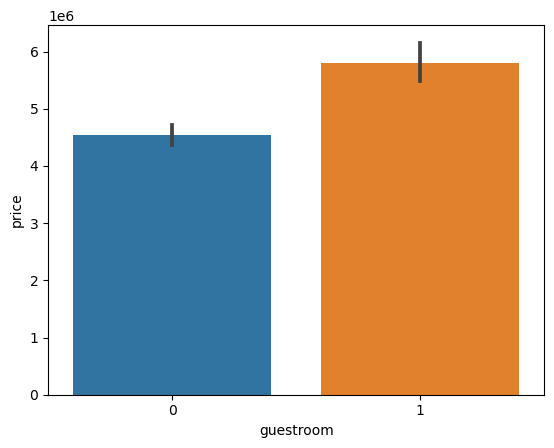

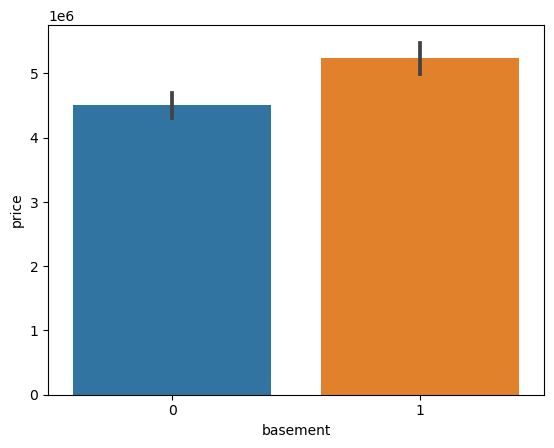

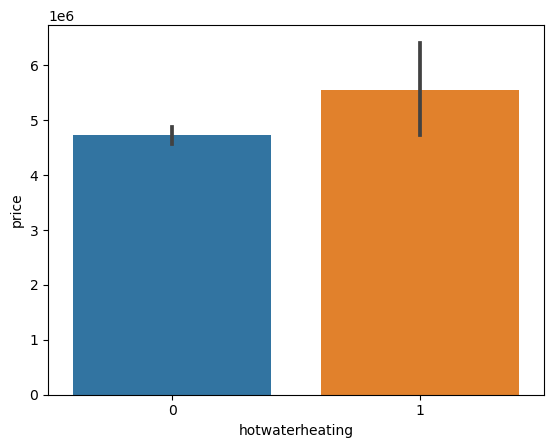

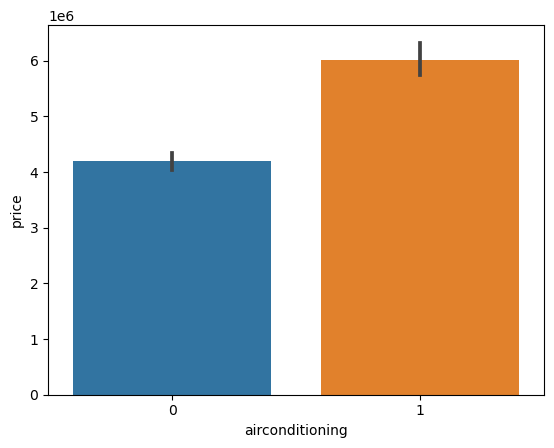

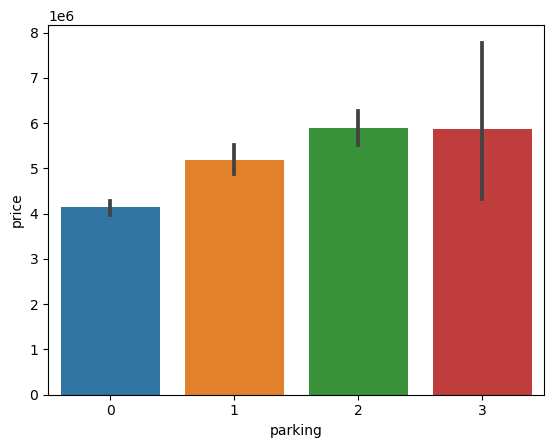

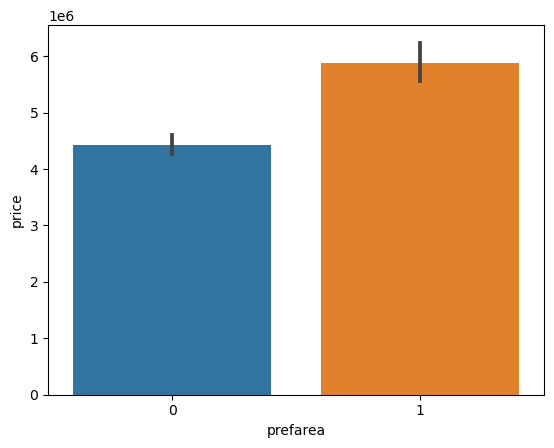

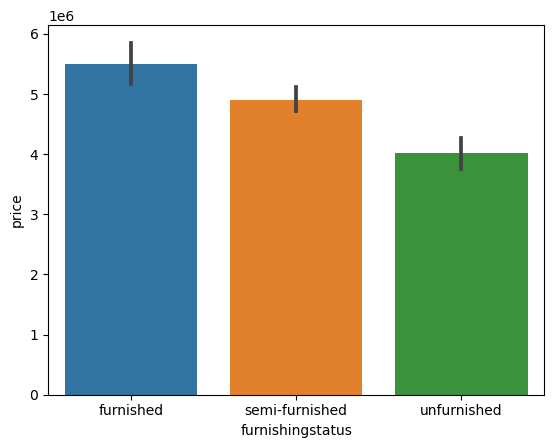

In [12]:
categorical_vars = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
for feature in categorical_vars:
    create_bar_chart(feature) 


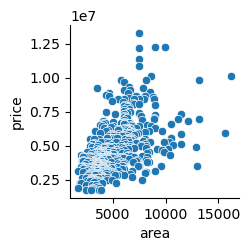

In [13]:
sns.pairplot(data=df,x_vars=['area'],y_vars='price')
plt.show()

/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_14113/4020493284.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


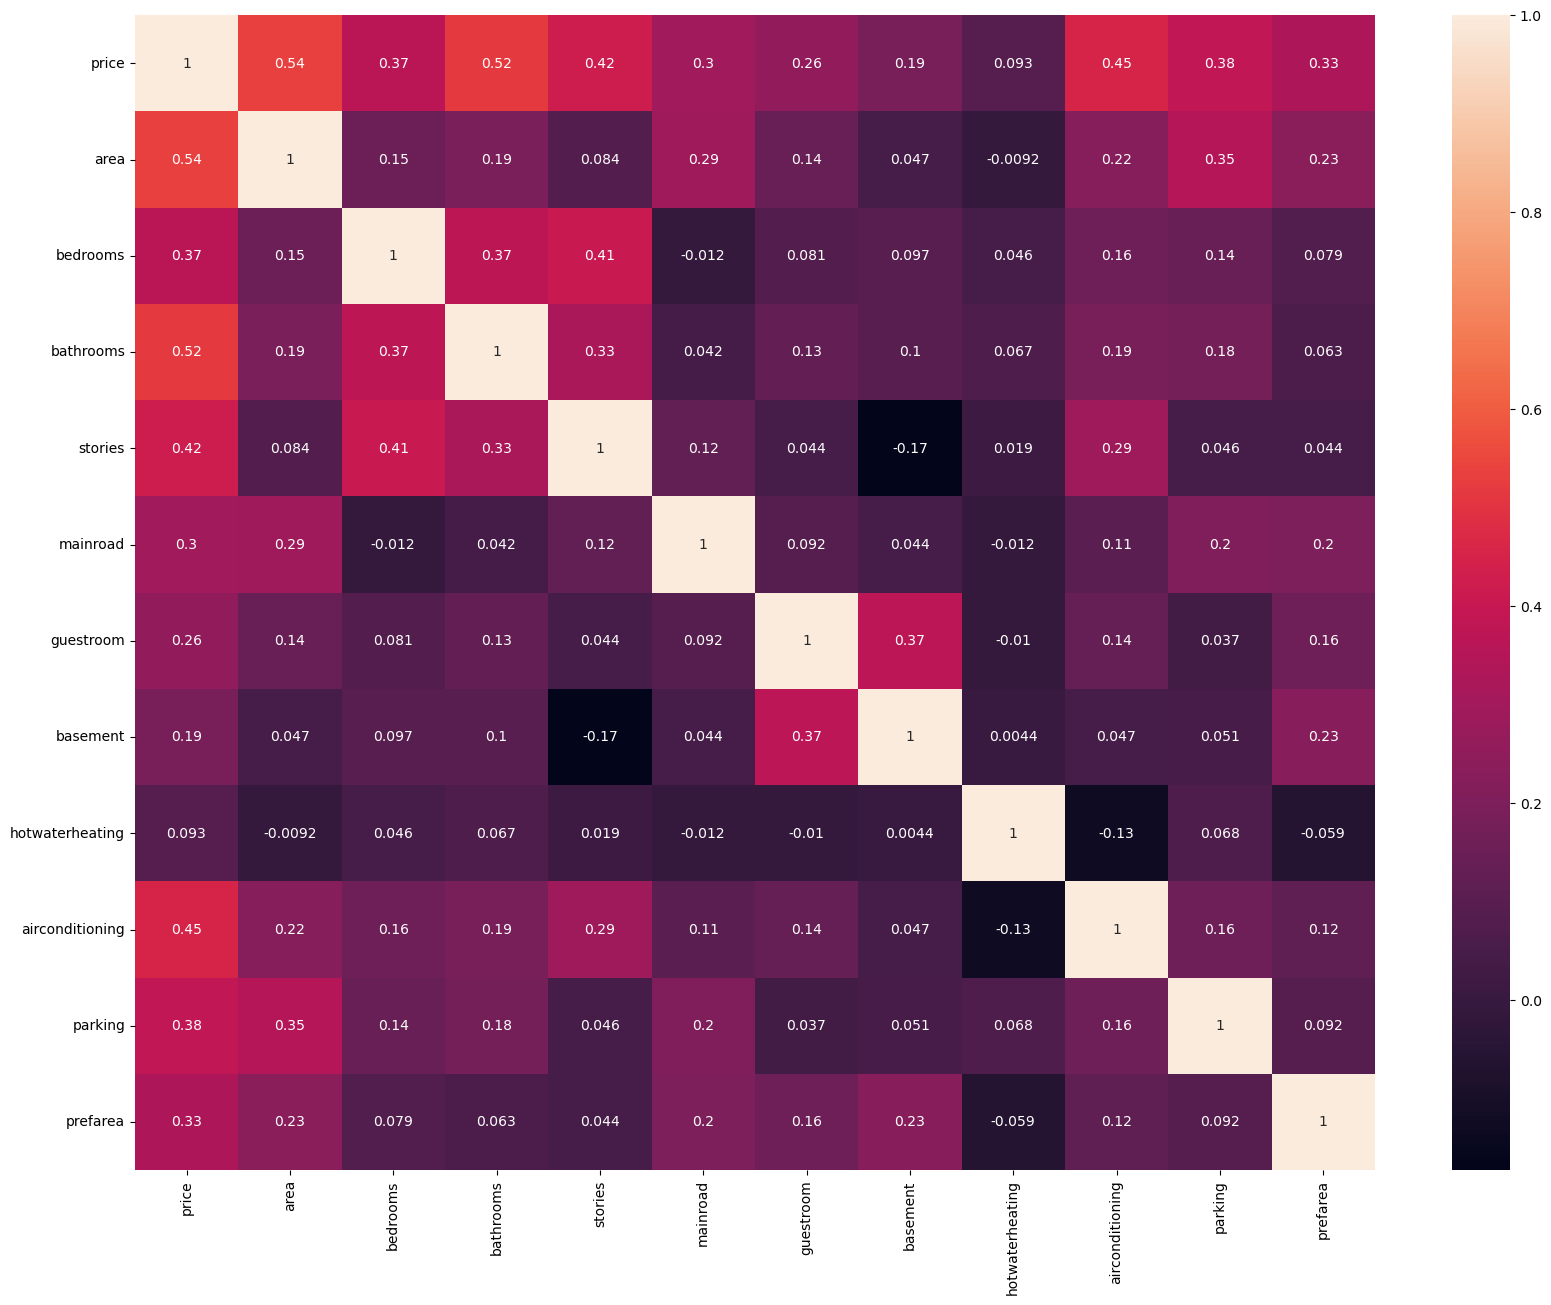

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Model Preparation

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
# creating dummy variable furnishingstatus
furnishing_status_dummy = pd.get_dummies(data=df['furnishingstatus'],drop_first=True)
furnishing_status_dummy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [17]:
# adding new columns to main dataframe
df = pd.concat([df,furnishing_status_dummy],axis='columns')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [18]:
# removing furnishingstatus feature
df.drop("furnishingstatus",inplace=True,axis='columns')

In [19]:
# diving the dataset into train test
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)


In [20]:
# printing shape for train and test dataset
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [21]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,3.810000e+02,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,4.756848e+06,5116.900262,2.931759,1.272966,1.805774,0.855643,0.170604,0.351706,0.052493,0.299213,0.727034,0.233596,0.414698,0.325459
std,1.820366e+06,2061.660813,0.736681,0.474651,0.885003,0.351913,0.376657,0.478131,0.223313,0.458515,0.857799,0.423674,0.493318,0.469162
min,1.750000e+06,1836.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.305000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,13200.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [22]:
# scaling the variables
vars_to_scale = ['price','area','bedrooms','bathrooms','stories','parking']
scaler = MinMaxScaler()
df_train[vars_to_scale] = scaler.fit_transform(df_train[vars_to_scale])

In [23]:
# checking the dataframe after scaling
df_train.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# making dependent and independent variables
y_train = df_train.pop("price")
X_train = df_train

In [25]:
# function to calculate vif
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['Vif'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by='Vif',ascending=False)
    return vif

In [26]:
# creating a function make model
def create_model(y_train,X_train):
    X_train_rfe = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train_rfe).fit()
    return (X_train_rfe, lr)

In [27]:
# creating 1st model
X_train_rfe_1, lr_1 = create_model(y_train,X_train)
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           8.83e-83
Time:                        20:13:17   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X_train_rfe_1.pop('const')
calculate_vif(X_train_rfe_1)

,Features,Vif
1,bedrooms,7.334390
4,mainroad,6.021774
0,area,4.672431
3,stories,2.701092
11,semi-furnished,2.188172
9,parking,2.122672
6,basement,2.015022
12,unfurnished,1.822718
8,airconditioning,1.770847
2,bathrooms,1.666512


```
Removing 'semi-furnished' due to high p value
```

In [29]:
X_train.drop("semi-furnished",inplace=True,axis='columns')

In [30]:
# model 2
X_train_rfe_2, lr_2 = create_model(y_train,X_train)
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.07e-83
Time:                        20:13:17   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X_train_rfe_2.pop("const")
calculate_vif(X_train_rfe_2)

,Features,Vif
1,bedrooms,6.587321
4,mainroad,5.675433
0,area,4.670442
3,stories,2.689344
9,parking,2.122636
6,basement,2.011951
8,airconditioning,1.766562
2,bathrooms,1.666284
10,prefarea,1.505338
5,guestroom,1.469081


```
removing 'bedrooms' due high p value and vif
```

In [32]:
X_train.drop("bedrooms",inplace=True,axis='columns')

In [33]:
# model 3
X_train_rfe_3, lr_3 = create_model(y_train,X_train)
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.73e-84
Time:                        20:13:18   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X_train_rfe_3.pop("const")
calculate_vif(X_train_rfe_3)

,Features,Vif
3,mainroad,4.791862
0,area,4.546377
2,stories,2.225831
8,parking,2.103005
5,basement,1.871437
7,airconditioning,1.764774
1,bathrooms,1.608652
9,prefarea,1.504142
4,guestroom,1.463201
10,unfurnished,1.332090


```
removing basement as the p value as greater than 0.005
```

In [35]:
X_train.drop("basement",inplace=True,axis='columns')

In [36]:
# model 4 
X_train_rfe_4,lr_4 = create_model(y_train,X_train)
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           3.13e-84
Time:                        20:13:18   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014      2.958      0.003       0.014       0.071
area                0.2335      0.030      7.772      0.000       0.174       0.293
bathrooms           0.2019      0.021      9.397      0.000       0.160       0.244
stories             0.1081      0.017      6.277      0.000       0.074       0.142
mainroad            0.0497      0.014      3.468      0.001       0.022       0.078
guestroom           0.0402      0.013      3.124      0.002       0.015       0.065
hotwaterheating     0.0876      0.022      4.051      0.000       0.045       0.130
airconditioning     0.0682      0.011      6.028      0.000       0.046       0.090
parking             0.0629      0.018      3.482      0.001       0.027       0.098
prefarea            0.0637      0.012      5.452      0.000       0.041       0.087
unfurnished        -0.0337      0.010     -3.295      0.001      -0.054      -0.014
==============================================================================
Omnibus:                       97.054   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.034
Skew:                           1.124   Prob(JB):                     1.18e-70
Kurtosis:                       6.902   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X_train_rfe_4.pop("const")
calculate_vif(X_train_rfe_4)

,Features,Vif
3,mainroad,4.550743
0,area,4.540186
2,stories,2.123314
7,parking,2.102863
6,airconditioning,1.751348
1,bathrooms,1.582378
8,prefarea,1.470549
9,unfurnished,1.331121
4,guestroom,1.301517
5,hotwaterheating,1.122413


```
model 4 or lr_4 is the final mode
```

### Residual Analysis

In [38]:
X_train = sm.add_constant(X_train)
y_train_pred = lr_4.predict(X_train)

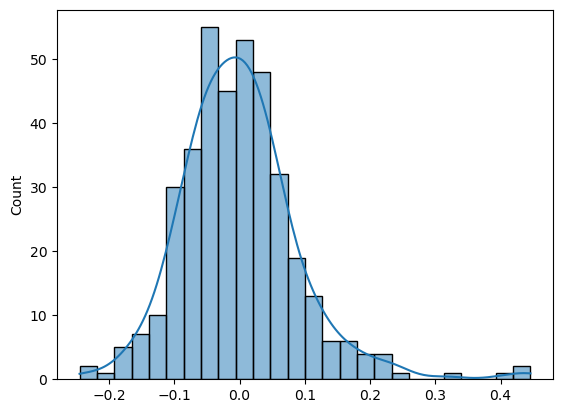

In [39]:
# checking normality of error terms
sns.histplot(x=(y_train - y_train_pred),kde=True)
plt.show()

```
Error terms are normally distributed
```

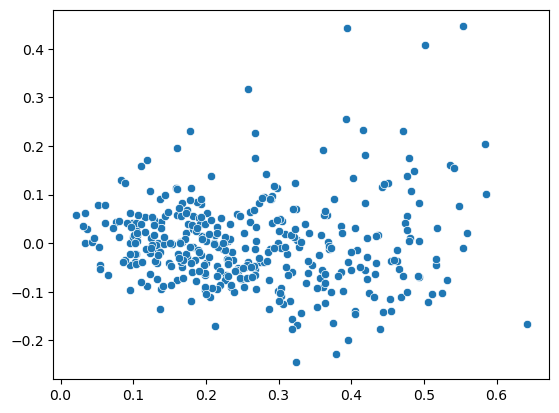

In [40]:
# Homoscedasticity check (There should be no visible pattern in residual values.)

sns.scatterplot(x=y_train_pred,y=(y_train-y_train_pred))
plt.show()

```
There is no visible pattern in residual values.
```

### Prediction on data

In [41]:
# scaling the test dataset
df_test[vars_to_scale] = scaler.transform(df_test[vars_to_scale])


In [42]:
# creating a list of final variables
final_vars = list(lr_4.params.index)
final_vars.remove('const')
final_vars.append('price')
final_vars

['area',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'unfurnished',
 'price']

In [43]:
# selecting only the final variables from the test dataset
df_test = df_test[final_vars]

In [44]:
df_test.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished,price
265,0.091869,0.0,0.333333,1,0,0,0,0.000000,1,0,0.229697
54,0.366420,0.5,0.333333,1,1,0,1,0.333333,0,0,0.484848
171,0.742080,0.0,0.000000,1,0,0,0,0.333333,1,0,0.303030
244,0.306582,0.0,0.333333,1,1,0,0,0.000000,1,0,0.242424
268,0.274023,0.0,0.333333,1,0,0,1,0.000000,0,0,0.227879


In [46]:
df_test.describe()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.298548,0.158537,0.268293,0.865854,0.195122,0.030488,0.353659,0.205285,0.237805,0.329268,0.263176
std,0.211922,0.281081,0.276007,0.341853,0.397508,0.172452,0.479569,0.289322,0.427043,0.471387,0.172077
min,-0.016367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006061
25%,0.148011,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142424
50%,0.259724,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.226061
75%,0.397439,0.500000,0.333333,1.000000,0.000000,0.000000,1.000000,0.333333,0.000000,1.000000,0.346970
max,1.263992,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091


In [47]:
# creating dependent and independent variables
y_test = df_test.pop("price")
X_test = df_test

In [48]:
# predicting the values using lr_4 model
X_test = sm.add_constant(X_test)
y_test_pred = lr_4.predict(X_test)

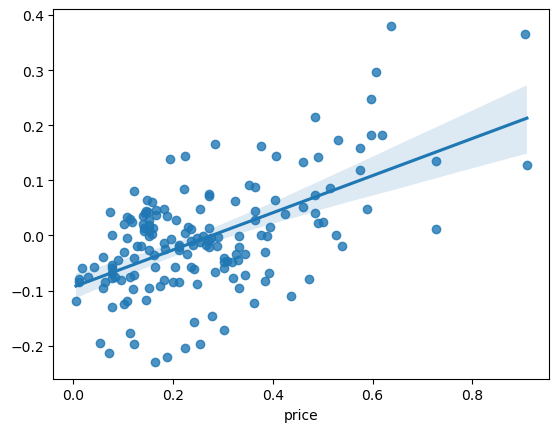

In [49]:
# checking the regression line 
sns.regplot(x=(y_test),y=(y_test - y_test_pred),fit_reg=True)
plt.show()

In [51]:
# checking the r2 score for training and testing 
print('Training r2 score: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Testing r2 score: ',r2_score(y_true=y_test,y_pred=y_test_pred))

Training r2 score:  0.6759630668130595
Testing r2 score:  0.6601344030219642


In [53]:
# checking the mean squared error for training and testing
print('Training mean squared error: ',mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print('Testing mean squared error: ',mean_squared_error(y_true=y_test,y_pred=y_test_pred))

Training mean squared error:  0.008027987118101538
Testing mean squared error:  0.010002184792935635


In [55]:
# final params with coeff
lr_4.params

const              0.042792
area               0.233517
bathrooms          0.201857
stories            0.108139
mainroad           0.049672
guestroom          0.040198
hotwaterheating    0.087618
airconditioning    0.068221
parking            0.062854
prefarea           0.063745
unfurnished       -0.033699
dtype: float64